#### Problem Statement -  Is to perform exploratory analysis in order to gain insights into the primary factors influencing customer churn.we will develop a Deep learning model to accurately predict customer churn.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\Mohsin\Downloads\Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
df.shape

(10000, 18)

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [11]:
df = df.reindex(columns=['RowNumber', 'CustomerId', 'Surname','CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type','Point Earned','Exited'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


In [12]:
df.shape

(10000, 18)

#### Checking the columns with datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.204400,3.013800,606.515100,0.203800
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.403283,1.405919,225.924839,0.402842
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000,1.000000


#### Checking missing values

In [15]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Exited                0
dtype: int64

In [16]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Exited                0
dtype: int64

#### In our dataset we have zero null values

### Checking the Duplicates

In [17]:
df.duplicated().sum()

0

In [18]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited


#### There is no Duplicates in this dataset 

### Univariate 

#### Checking Outliers  

In [19]:
def univariate(i):
    if i.dtypes != "object":
        i.plot(kind="box")
        plt.title("box plot")
        plt.show()

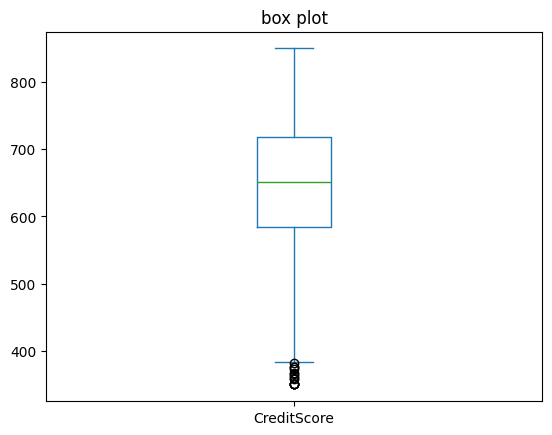

In [20]:
univariate(df["CreditScore"])

#### Found outliers in CreditScore column 

In [21]:
# Treating outlier with IQR

In [22]:
q3=df['CreditScore'].quantile(0.75)
q1=df['CreditScore'].quantile(0.25)
iqr=q3-q1
print("IQR : ",iqr)
lower=np.round(q1-1.5*(iqr))
print("Lower : ",lower)
upper=np.round(q3+1.5*(iqr))
print("Upper : ",upper)

IQR :  134.0
Lower :  383.0
Upper :  919.0


In [23]:
df[(df['CreditScore']>lower) & (df['CreditScore']<upper)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1


#### Treating Outliers with map lambda function 

In [24]:
df['CreditScore'] = df['CreditScore'].map(lambda age :upper if age >=upper else lower if age<=lower else age)

<Axes: >

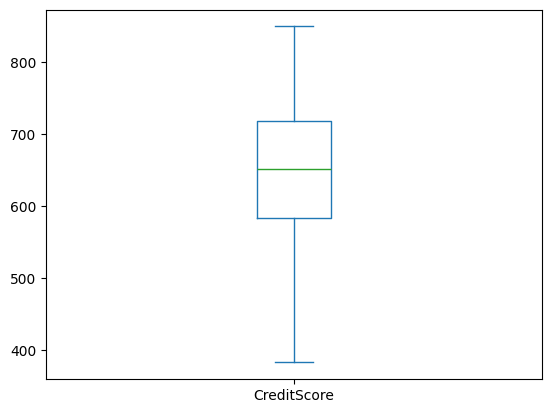

In [25]:
df['CreditScore'].plot(kind='box')

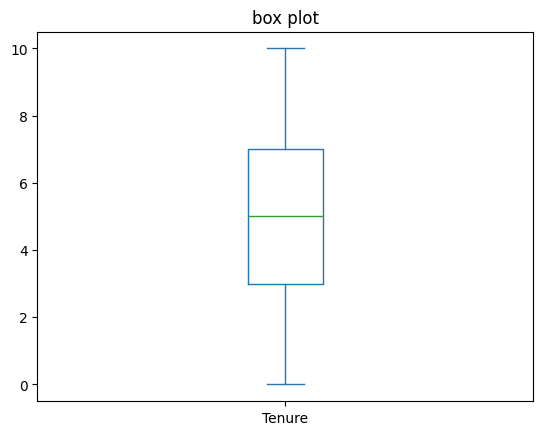

In [26]:
univariate(df["Tenure"])

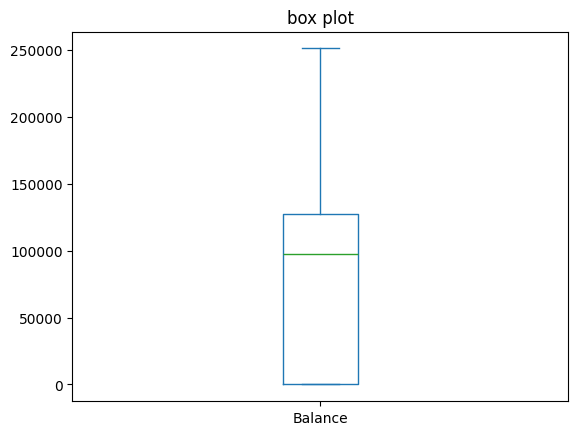

In [27]:
univariate(df["Balance"])

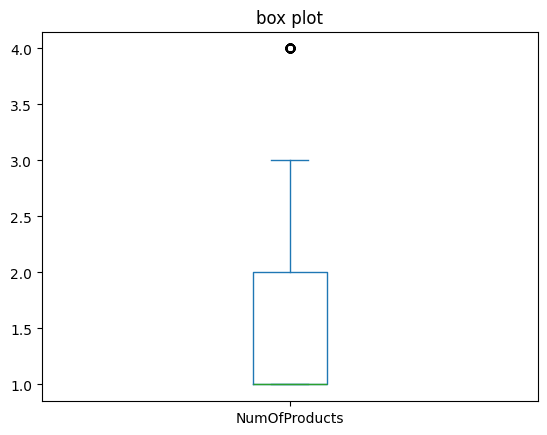

In [28]:
univariate(df["NumOfProducts"])

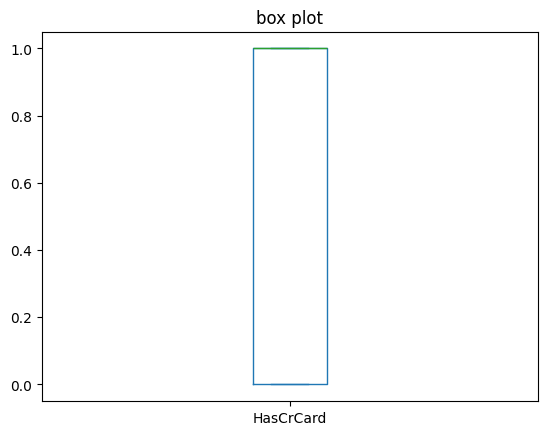

In [29]:
univariate(df["HasCrCard"])

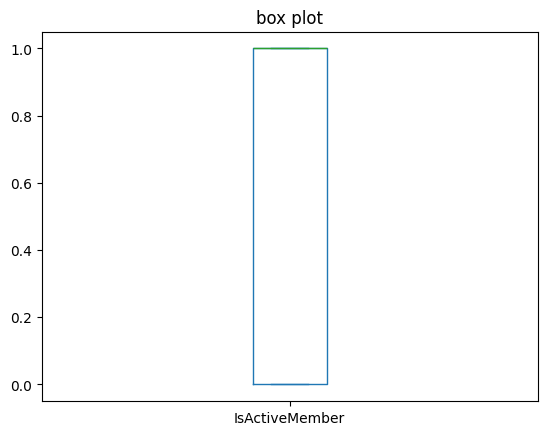

In [30]:
univariate(df["IsActiveMember"])

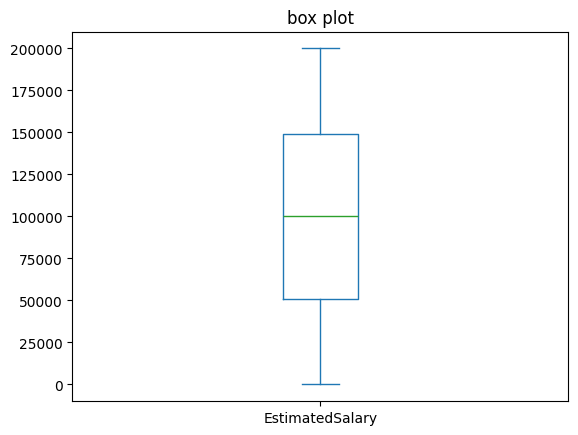

In [31]:
univariate(df["EstimatedSalary"])

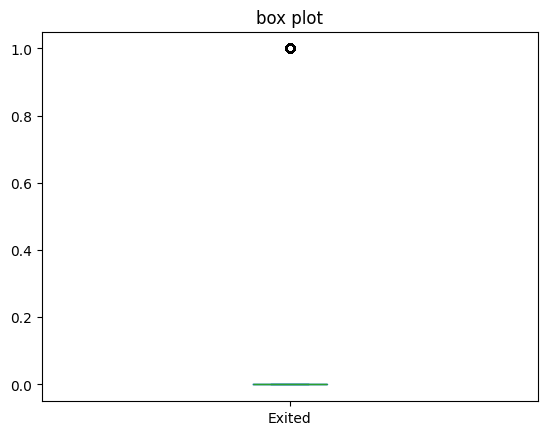

In [32]:
univariate(df["Exited"])

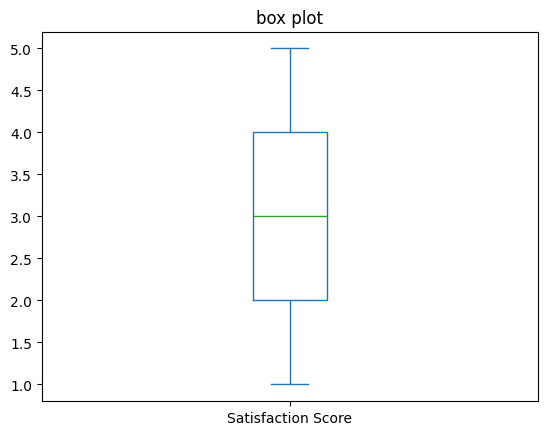

In [33]:
univariate(df["Satisfaction Score"])

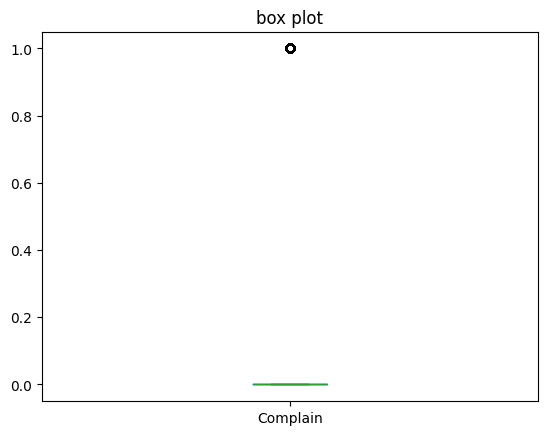

In [34]:
univariate(df["Complain"])

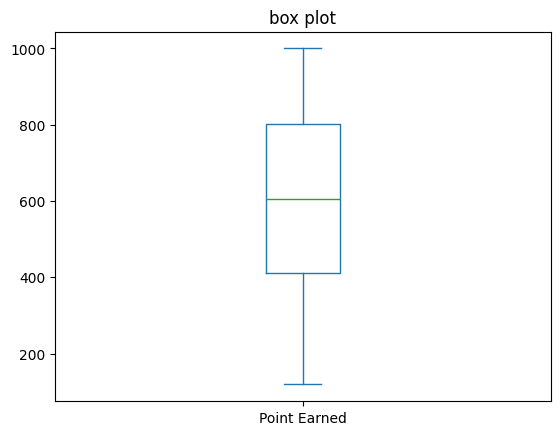

In [35]:
univariate(df["Point Earned"])

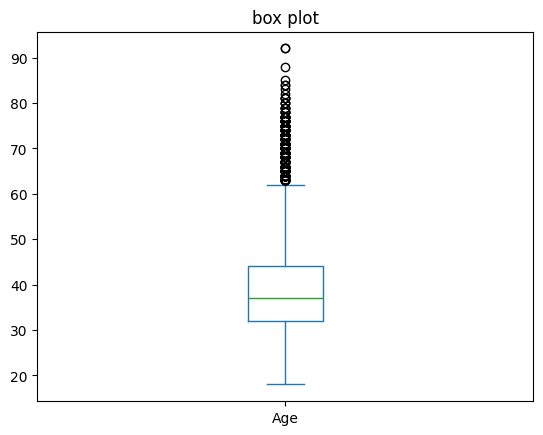

In [36]:
univariate(df["Age"])

<Axes: ylabel='Density'>

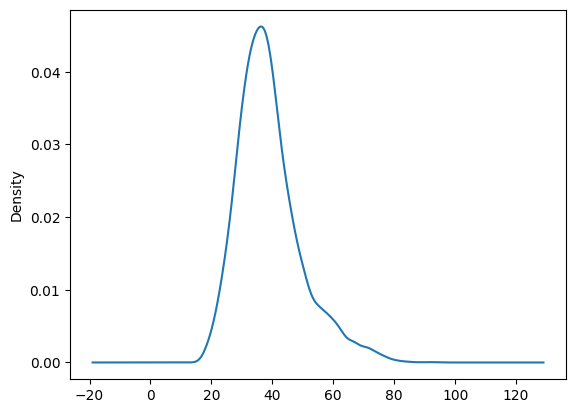

In [37]:
df['Age'].plot(kind='kde')

#### Categorical columns 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  float64
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

In [39]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Geography', ylabel='count'>

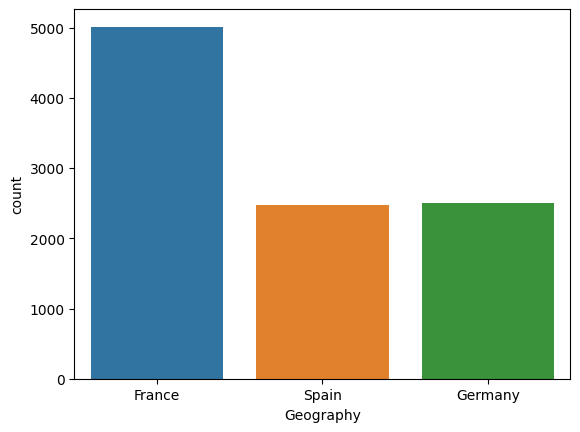

In [40]:
sns.countplot(df["Geography"])

In [41]:
# The customers are more from France then compare to Spain and Germany

<Axes: xlabel='Gender', ylabel='count'>

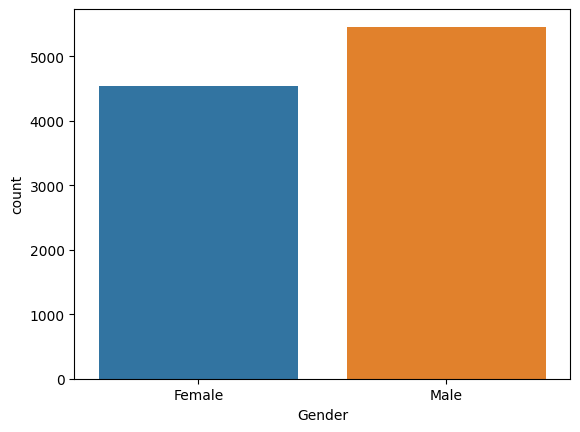

In [42]:
sns.countplot(df["Gender"])

In [43]:
# Male Customers slightly high then compare to Female customers

<Axes: xlabel='Card Type', ylabel='count'>

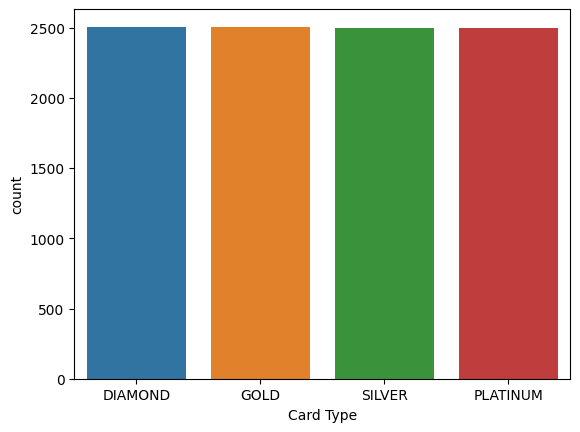

In [44]:
sns.countplot(df["Card Type"])

In [45]:
# 

#### Bi variate

<Axes: xlabel='Geography'>

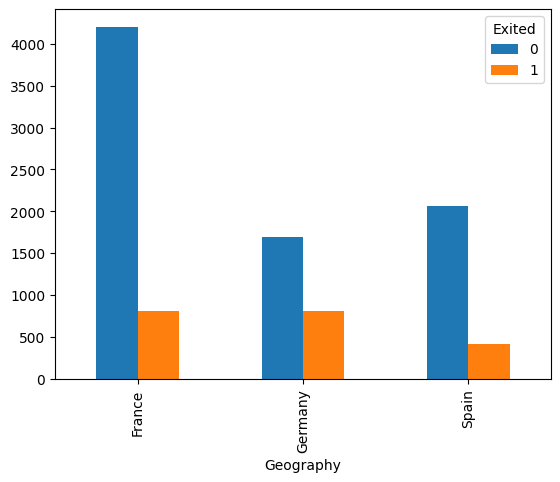

In [46]:
pd.crosstab(df['Geography'], df['Exited']).plot(kind="bar",width=0.5)

In [47]:
# Compare to France and Spain, Germany customers are likely to churn and from this region we have less customers so we should give some offers at this region to gain more customers from germany

<Axes: xlabel='Gender'>

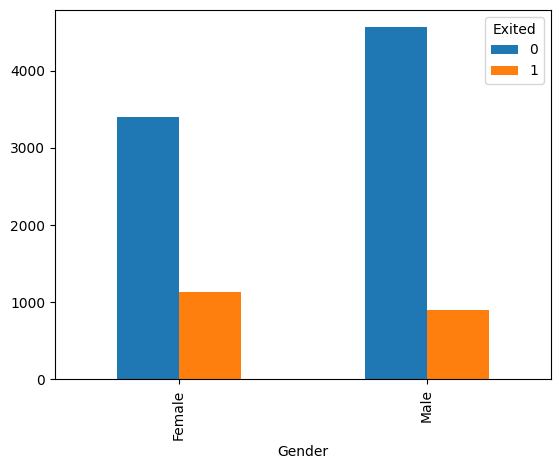

In [48]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind="bar",width=0.5)

In [49]:
# we should give more offers to Female customers because bank have more male customers then compare to female

<Axes: xlabel='Card Type'>

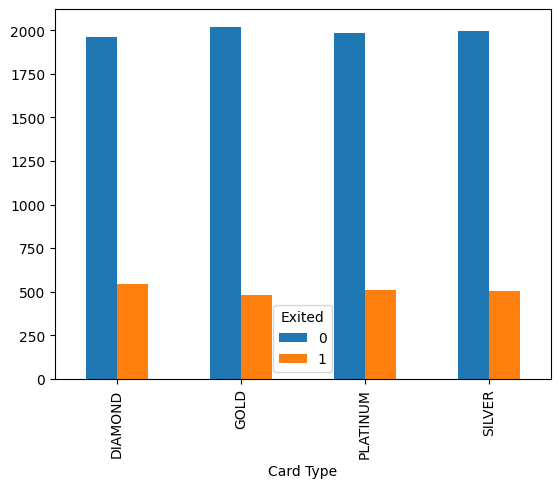

In [50]:
pd.crosstab(df['Card Type'], df['Exited']).plot(kind="bar",width=0.5)

In [51]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'Exited'],
      dtype='object')

<Axes: xlabel='CreditScore', ylabel='Exited'>

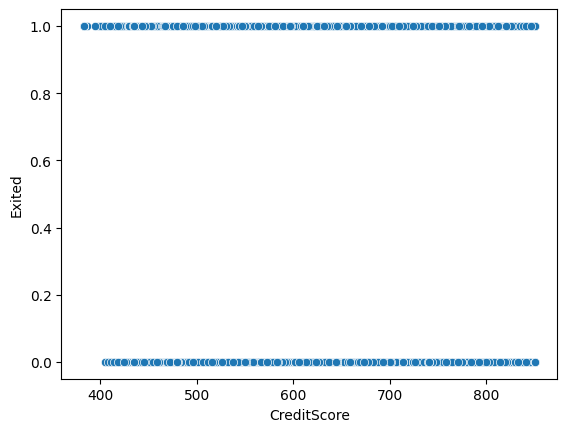

In [52]:
sns.scatterplot(data = df, x = df['CreditScore'],y = df['Exited'] )

<Axes: xlabel='Age', ylabel='Exited'>

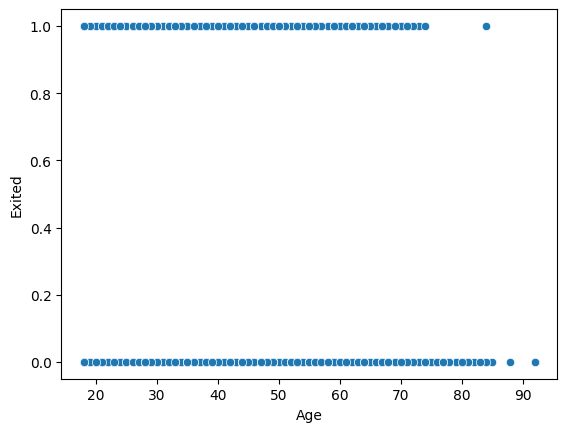

In [53]:
sns.scatterplot(data = df, x = df['Age'],y = df['Exited'] )

### Data Cleaning 

In [54]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,9998,15584532,Liu,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1


In [55]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'Exited'],
      dtype='object')

In [56]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [57]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1


In [58]:
df['CreditScore'] = df["CreditScore"].astype('int')

In [59]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int32  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Card Type           10000 non-null  object 
 13  Point Earned        10000 non-null  int64  
 14  Exited              10000 non-null  int64  
dtypes: float64(2), int32(1), int64(9), object(3)
memory us

### Separating Target variable and Input variables

In [61]:
x = df.iloc[:,:14]

In [62]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [63]:
x.shape

(10000, 14)

In [64]:
y = df.iloc[:,-1]

In [65]:
y.shape

(10000,)

### Splitting data into train and test

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [67]:
x_test.shape

(2000, 14)

In [68]:
x_train.shape

(8000, 14)

In [69]:
y_test.shape

(2000,)

In [70]:
y_train.shape

(8000,)

### Dividing Categorical and Numerical features

#### Train data 

In [71]:
x_train_num = x_train.select_dtypes(include=['float64','int64','int32'])
x_train_cat = x_train.select_dtypes(include=['object'])

In [72]:
x_train_cat.shape

(8000, 3)

In [73]:
x_train_num.shape

(8000, 11)

#### Test data

In [74]:
x_test_num = x_test.select_dtypes(include=['float64','int64','int32'])
x_test_cat = x_test.select_dtypes(include=['object'])

In [75]:
x_test_cat.shape

(2000, 3)

In [76]:
x_test_num.shape

(2000, 11)

### Rescaling Input features 

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Train Data 

In [78]:
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),columns=x_train_num.columns,index = x_train_num.index)

x_train_num_rescaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
5217,0.754109,-1.043531,0.000432,0.332277,-0.910631,0.642207,0.966317,-0.049619,-0.509748,-0.728059,1.283836
3805,0.175802,-0.472262,-1.725606,-1.232138,-0.910631,-1.557131,-1.034857,0.011120,-0.509748,-1.440794,1.137581
3582,0.361686,-0.377050,-0.344776,-1.232138,-0.910631,0.642207,-1.034857,-1.577036,-0.509748,-0.728059,0.211297
1996,-1.208005,2.193664,-1.035191,-1.232138,0.799474,-1.557131,-1.034857,-0.985683,1.961756,-0.728059,-0.085645
9584,-0.908524,0.194220,-1.035191,0.378896,-0.910631,0.642207,0.966317,-1.392446,1.961756,1.410146,-1.495014


In [79]:
x_train_num_rescaled


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
5217,0.754109,-1.043531,0.000432,0.332277,-0.910631,0.642207,0.966317,-0.049619,-0.509748,-0.728059,1.283836
3805,0.175802,-0.472262,-1.725606,-1.232138,-0.910631,-1.557131,-1.034857,0.011120,-0.509748,-1.440794,1.137581
3582,0.361686,-0.377050,-0.344776,-1.232138,-0.910631,0.642207,-1.034857,-1.577036,-0.509748,-0.728059,0.211297
1996,-1.208005,2.193664,-1.035191,-1.232138,0.799474,-1.557131,-1.034857,-0.985683,1.961756,-0.728059,-0.085645
9584,-0.908524,0.194220,-1.035191,0.378896,-0.910631,0.642207,0.966317,-1.392446,1.961756,1.410146,-1.495014
...,...,...,...,...,...,...,...,...,...,...,...
9252,-2.065139,-0.757897,0.690847,1.026556,-0.910631,-1.557131,0.966317,-1.375444,-0.509748,1.410146,-0.666234
7863,0.981301,0.765490,1.036054,1.049798,-0.910631,0.642207,0.966317,-0.649067,-0.509748,-0.015324,0.322097
6738,-0.805255,-0.377050,1.381262,0.923450,0.799474,0.642207,0.966317,0.358474,-0.509748,-0.015324,-0.573163
6993,-0.123679,-0.377050,-1.380399,0.418870,0.799474,0.642207,0.966317,0.692404,-0.509748,-1.440794,-0.626347


#### Test Data

In [80]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),columns=x_test_num.columns,index = x_test_num.index)

In [81]:
x_test_cat.head()

,Geography,Gender,Card Type
9837,France,Male,SILVER
6018,France,Male,DIAMOND
3339,Spain,Female,PLATINUM
7227,Spain,Female,PLATINUM
2703,Germany,Male,PLATINUM


In [82]:
x_test_cat['Card Type'].value_counts()

SILVER      507
PLATINUM    505
GOLD        496
DIAMOND     492
Name: Card Type, dtype: int64

#### OneHot encoding

In [83]:
x_train_cat_oh = x_train_cat[["Geography","Gender"]]

In [84]:
x_train_cat_oh.head()

,Geography,Gender
5217,France,Male
3805,Spain,Male
3582,France,Male
1996,France,Male
9584,Germany,Male


In [85]:
x_train_cat_la = x_train_cat[['Card Type']]

In [86]:
x_train_cat_la

,Card Type
5217,DIAMOND
3805,GOLD
3582,GOLD
1996,SILVER
9584,DIAMOND
...,...
9252,PLATINUM
7863,PLATINUM
6738,GOLD
6993,PLATINUM


In [87]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)

In [88]:
x_train_cat_ohot = pd.DataFrame(encoder.fit_transform(x_train_cat_oh),columns=encoder.get_feature_names_out(x_train_cat_oh.columns),index = x_train_cat_oh.index)

In [89]:
x_train_cat_ohot.head()

,Geography_Germany,Geography_Spain,Gender_Male
5217,0.0,0.0,1.0
3805,0.0,1.0,1.0
3582,0.0,0.0,1.0
1996,0.0,0.0,1.0
9584,1.0,0.0,1.0


In [90]:
x_train_cat_ohot["Geography_Germany"].value_counts()

0.0    5966
1.0    2034
Name: Geography_Germany, dtype: int64

In [91]:
card_encoder = {'DIAMOND':1,'PLATINUM':2,'GOLD':3,'SILVER':4}
x_train_cat_la['Card Type'] = x_train_cat_la['Card Type'].apply(lambda x : card_encoder[x])

x_train_cat_la.head()

,Card Type
5217,1
3805,3
3582,3
1996,4
9584,1


In [92]:
x_train_cat_la["Card Type"].value_counts()

1    2015
3    2006
2    1990
4    1989
Name: Card Type, dtype: int64

In [93]:
x_train_transform = pd.concat([x_train_num_rescaled,x_train_cat_ohot,x_train_cat_la],axis=1)
x_train_transform.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type
5217,0.754109,-1.043531,0.000432,0.332277,-0.910631,0.642207,0.966317,-0.049619,-0.509748,-0.728059,1.283836,0.0,0.0,1.0,1
3805,0.175802,-0.472262,-1.725606,-1.232138,-0.910631,-1.557131,-1.034857,0.011120,-0.509748,-1.440794,1.137581,0.0,1.0,1.0,3
3582,0.361686,-0.377050,-0.344776,-1.232138,-0.910631,0.642207,-1.034857,-1.577036,-0.509748,-0.728059,0.211297,0.0,0.0,1.0,3
1996,-1.208005,2.193664,-1.035191,-1.232138,0.799474,-1.557131,-1.034857,-0.985683,1.961756,-0.728059,-0.085645,0.0,0.0,1.0,4
9584,-0.908524,0.194220,-1.035191,0.378896,-0.910631,0.642207,0.966317,-1.392446,1.961756,1.410146,-1.495014,1.0,0.0,1.0,1


In [94]:
x_test_cat_oh = x_test_cat[["Geography","Gender"]]

In [95]:
x_test_cat_oh

,Geography,Gender
9837,France,Male
6018,France,Male
3339,Spain,Female
7227,Spain,Female
2703,Germany,Male
...,...,...
9098,Germany,Female
6933,Spain,Male
84,France,Female
764,Germany,Male


In [96]:

x_test_cat_ohot = pd.DataFrame(encoder.transform(x_test_cat_oh),columns=encoder.get_feature_names_out(x_test_cat_oh.columns),index = x_test_cat_oh.index)

In [97]:
x_test_cat_ohot.head()

,Geography_Germany,Geography_Spain,Gender_Male
9837,0.0,0.0,1.0
6018,0.0,0.0,1.0
3339,0.0,1.0,0.0
7227,0.0,1.0,0.0
2703,1.0,0.0,1.0


In [98]:
x_test_cat_la = x_test_cat[['Card Type']]

In [99]:
x_test_cat_la

,Card Type
9837,SILVER
6018,DIAMOND
3339,PLATINUM
7227,PLATINUM
2703,PLATINUM
...,...
9098,PLATINUM
6933,PLATINUM
84,SILVER
764,GOLD


In [100]:
card_encoder = {'DIAMOND':1,'PLATINUM':2,'GOLD':3,'SILVER':4}
x_test_cat_la['Card Type'] = x_test_cat_la['Card Type'].apply(lambda x : card_encoder[x])

x_test_cat_la.head()

,Card Type
9837,4
6018,1
3339,2
7227,2
2703,2


In [101]:
x_test_cat_la["Card Type"].value_counts()

4    507
2    505
3    496
1    492
Name: Card Type, dtype: int64

In [102]:
x_test_transform = pd.concat([x_test_num_rescaled,x_test_cat_ohot,x_test_cat_la],axis=1)
x_test_transform.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type
9837,1.022608,-0.091415,0.000432,1.196450,-0.910631,0.642207,0.966317,-0.919626,-0.509748,-0.728059,-1.025225,0.0,0.0,1.0,4
6018,0.826397,-0.853108,0.690847,-1.232138,0.799474,-1.557131,0.966317,0.761944,-0.509748,1.410146,1.164173,0.0,0.0,1.0,1
3339,-0.536756,-1.043531,-0.344776,0.800609,0.799474,0.642207,-1.034857,-0.670730,1.961756,1.410146,-1.579222,0.0,1.0,0.0,2
7227,0.547570,-1.424378,-1.035191,-1.232138,-0.910631,0.642207,-1.034857,-1.110460,1.961756,-0.015324,-0.732714,0.0,1.0,0.0,2
2703,-1.982523,0.670278,0.690847,0.536528,-0.910631,0.642207,-1.034857,-1.644054,1.961756,-1.440794,1.722602,1.0,0.0,1.0,2


In [103]:
pip install keras_tuner

In [104]:
print(x_train.shape, y_train.shape)

(8000, 14) (8000,)


### Building Logical Structure 

In [105]:
y.value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [106]:
import imblearn
from imblearn.over_sampling import SMOTE

In [107]:
s = SMOTE()

In [108]:
x_train,y_train = s.fit_resample(x_train_transform,y_train)

In [109]:
print(x_train_transform.shape)
print(y_train.shape)

(8000, 15)
(12706,)


In [110]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type
0,0.754109,-1.043531,0.000432,0.332277,-0.910631,0.642207,0.966317,-0.049619,-0.509748,-0.728059,1.283836,0.0,0.0,1.0,1
1,0.175802,-0.472262,-1.725606,-1.232138,-0.910631,-1.557131,-1.034857,0.011120,-0.509748,-1.440794,1.137581,0.0,1.0,1.0,3
2,0.361686,-0.377050,-0.344776,-1.232138,-0.910631,0.642207,-1.034857,-1.577036,-0.509748,-0.728059,0.211297,0.0,0.0,1.0,3
3,-1.208005,2.193664,-1.035191,-1.232138,0.799474,-1.557131,-1.034857,-0.985683,1.961756,-0.728059,-0.085645,0.0,0.0,1.0,4
4,-0.908524,0.194220,-1.035191,0.378896,-0.910631,0.642207,0.966317,-1.392446,1.961756,1.410146,-1.495014,1.0,0.0,1.0,1


In [111]:
y_train.value_counts()

0    6353
1    6353
Name: Exited, dtype: int64

### Importing required libraries 

In [112]:
import keras
import keras_tuner as k
from keras import Sequential
from keras.layers import Dense, Input, BatchNormalization,Dropout
from keras.initializers import he_normal,he_uniform,glorot_uniform,glorot_normal
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD,gradient_descent_v2,Adam,Adadelta
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score,recall_score,ConfusionMatrixDisplay

Using TensorFlow backend


### Model Building 

In [113]:
def modelss(hp):
    
    model = Sequential()
    model.add(Input(shape=(15,)))
    for i in range (hp.Int("hiddenlayers",min_value = 4,max_value = 10)):
        model.add(Dense(units=hp.Int("neurons{}".format(i),min_value = 1,max_value = 15),
                   activation=hp.Choice("activation",values = ["sigmoid","tanh","relu"]),kernel_initializer=hp.Choice("weight_initi",values = ["he_normal","he_uniform","glorot_uniform","glorot_normal"])))
    #    model.add(BatchNormalization())
     #   model.add(Dropout(rate=hp.Float("dropout",min_value = 0.1,max_value = 0.5)))

    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss = "binary_crossentropy",optimizer = hp.Choice("optimizer",["sgd","adam","adadelta"]),metrics=['accuracy'])


    return model

In [114]:
tuner = k.RandomSearch(modelss,objective="val_accuracy",max_trials=3,directory=r"C:\Users\Mohsin\Desktop\ANN_Project",project_name = "file_4")

In [115]:
x_train.shape

(12706, 15)

In [116]:
y_train.shape

(12706,)

### Training 

In [117]:
tuner.search(x_train,y_train,epochs=10,validation_data =(x_test_transform,y_test))

Trial 3 Complete [00h 00m 10s]
val_accuracy: 0.9984999895095825

Best val_accuracy So Far: 0.9984999895095825
Total elapsed time: 00h 00m 28s


In [118]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
weight_initi (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_uniform', 'glorot_normal'], 'ordered': False}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam', 'ad

In [119]:
tuner.results_summary()

Results summary
Results in C:\Users\Mohsin\Desktop\ANN_Project\file_4
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
hiddenlayers: 4
neurons0: 6
activation: relu
weight_initi: glorot_uniform
neurons1: 5
neurons2: 3
neurons3: 9
optimizer: adam
Score: 0.9984999895095825

Trial 2 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 2
activation: relu
weight_initi: glorot_uniform
neurons1: 10
neurons2: 7
neurons3: 6
optimizer: adam
neurons4: 10
neurons5: 7
neurons6: 9
neurons7: 3
neurons8: 1
Score: 0.9984999895095825

Trial 1 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 11
activation: relu
weight_initi: he_uniform
neurons1: 7
neurons2: 10
neurons3: 4
optimizer: sgd
neurons4: 1
neurons5: 1
neurons6: 1
neurons7: 1
neurons8: 1
Score: 0.8044999837875366


In [120]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 4,
 'neurons0': 6,
 'activation': 'relu',
 'weight_initi': 'glorot_uniform',
 'neurons1': 5,
 'neurons2': 3,
 'neurons3': 9,
 'optimizer': 'adam'}

In [121]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [122]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 96        
                                                                 
 dense_1 (Dense)             (None, 5)                 35        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 9)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [123]:
history = fmodel.fit(x_train_transform,y_train,epochs=30,batch_size = 10,validation_split=0.15)

Epoch 1/30
680/680 [==============================] - 2s 2ms/step - loss: 0.0121 - accuracy: 0.9985 - val_loss: 0.0072 - val_accuracy: 0.9992
Epoch 2/30
680/680 [==============================] - 1s 2ms/step - loss: 0.0109 - accuracy: 0.9985 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 3/30
680/680 [==============================] - 1s 2ms/step - loss: 0.0100 - accuracy: 0.9984 - val_loss: 0.0065 - val_accuracy: 0.9992
Epoch 4/30
680/680 [==============================] - 1s 2ms/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.0074 - val_accuracy: 0.9992
Epoch 5/30
680/680 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.0063 - val_accuracy: 0.9992
Epoch 6/30
680/680 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 0.0105 - val_accuracy: 0.9975
Epoch 7/30
680/680 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0063 - val_accuracy: 0.9992
Epoch 

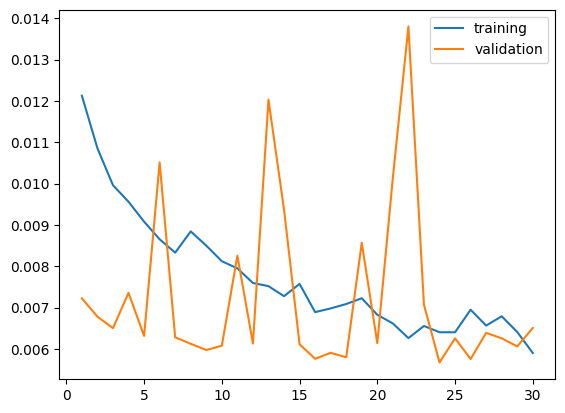

In [124]:
plt.plot(range(1,31),history.history['loss'],label='training')
plt.plot(range(1,31),history.history['val_loss'],label='validation')
plt.legend()

In [125]:
history.history['val_loss']

[0.0072244200855493546,
 0.0067835315130651,
 0.006503160577267408,
 0.0073595172725617886,
 0.006315299309790134,
 0.010512425564229488,
 0.0062820445746183395,
 0.006126386113464832,
 0.005975968670099974,
 0.006079534534364939,
 0.008258447982370853,
 0.0061309742741286755,
 0.01203161757439375,
 0.00937300082296133,
 0.006113612093031406,
 0.005762312561273575,
 0.005907854065299034,
 0.005798090249300003,
 0.008569764904677868,
 0.006141544319689274,
 0.010144348256289959,
 0.013801001012325287,
 0.00706970551982522,
 0.0056742336601018906,
 0.006258372683078051,
 0.005757644772529602,
 0.006390805821865797,
 0.006258436478674412,
 0.0060609495267271996,
 0.006509761326014996]

In [126]:
predicted = fmodel.predict(x_test_transform)

63/63 [==============================] - 0s 1ms/step


In [127]:
predicted = np.where(predicted>0.5,1,0)

In [128]:
accuracy_score(y_test,predicted)

0.9985

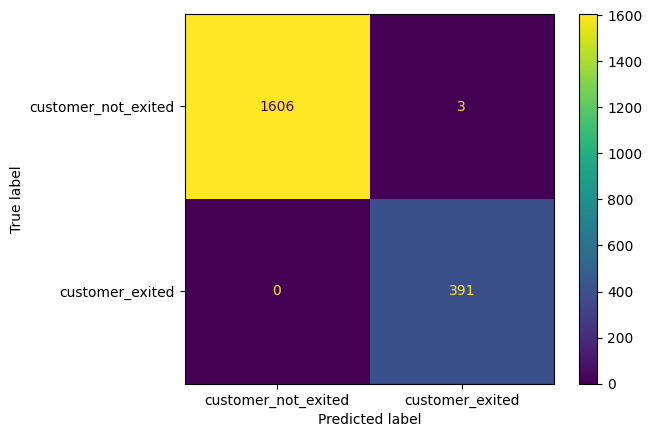

In [129]:
cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm,display_labels=['customer_not_exited','customer_exited'])
va.plot()
plt.show()

In [130]:
from mlxtend.plotting import plot_decision_regions

In [132]:
plot_decision_regions(x_train,y_train.values,clf=modelss)

ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>